## Laplace

In [1]:
import underworld as uw
from underworld import function as fn
import glucifer
%pylab inline
import matplotlib.pylab as plt

import slippy2 as sp
import itertools

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Set number of dimensions.
dim = 2
# Set box size.
boxHeight = 1.0
boxLength = 2.0
# Set the resolution.
resx = 16
resy = 8

In [3]:
mesh = uw.mesh.FeMesh_Cartesian( elementType = ("Q1/dQ0"), 
                                 elementRes  = (resx, resy), 
                                 minCoord    = (0., 0.), 
                                 maxCoord    = (boxLength, boxHeight))


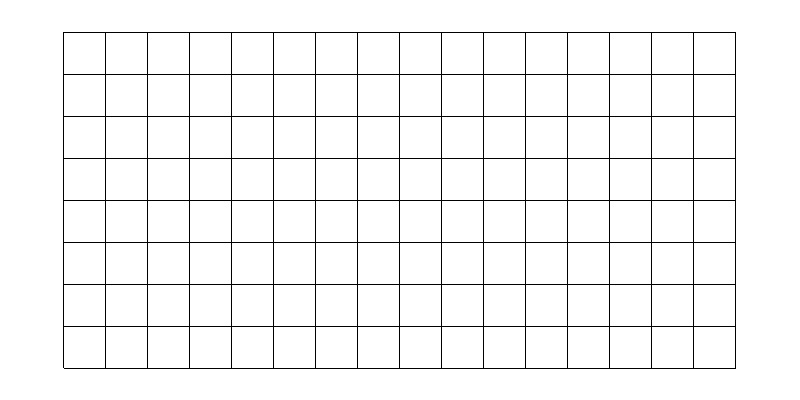

In [4]:
# gLucifer visualisation of mesh
fig = glucifer.Figure( figsize=(800,400) )
fig.append(glucifer.objects.Mesh( mesh ))
fig.show()

In [5]:
temperatureField = uw.mesh.MeshVariable( mesh=mesh, nodeDofCount=1 )
temperatureField.data[:] = 0.

In [6]:
jWalls = mesh.specialSets["MinJ_VertexSet"] + mesh.specialSets["MaxJ_VertexSet"]


In [7]:
tempBC = uw.conditions.DirichletCondition( variable=temperatureField, indexSetsPerDof=(jWalls,) )


In [8]:

# set bottom wall temperature bc
for index in mesh.specialSets["MinJ_VertexSet"]:
    temperatureField.data[index] = 1.0
# set top wall temperature bc
for index in mesh.specialSets["MaxJ_VertexSet"]:
    temperatureField.data[index] = 0.0


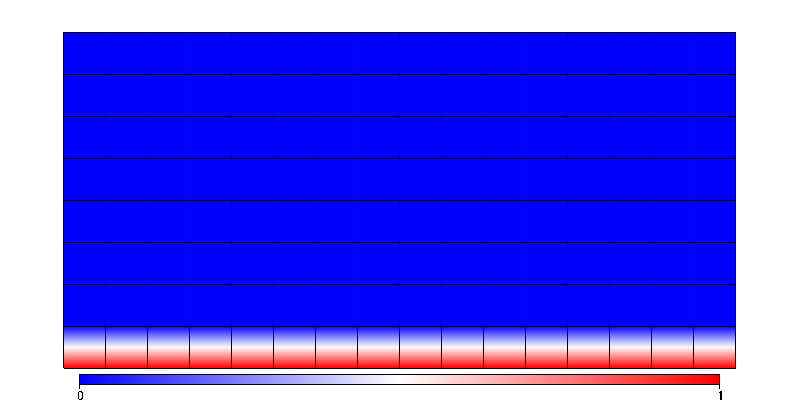

In [9]:
# gLucifer visualisation of temperature field & mesh
fig.append( glucifer.objects.Surface( mesh, temperatureField, colours="blue white red" ) )
fig.show()

In [10]:
heatequation = uw.systems.SteadyStateHeat(temperatureField=temperatureField, fn_diffusivity=1.0, conditions=[tempBC,])

In [11]:

# get the default heat equation solver
heatsolver = uw.systems.Solver(heatequation)
# solve
heatsolver.solve()


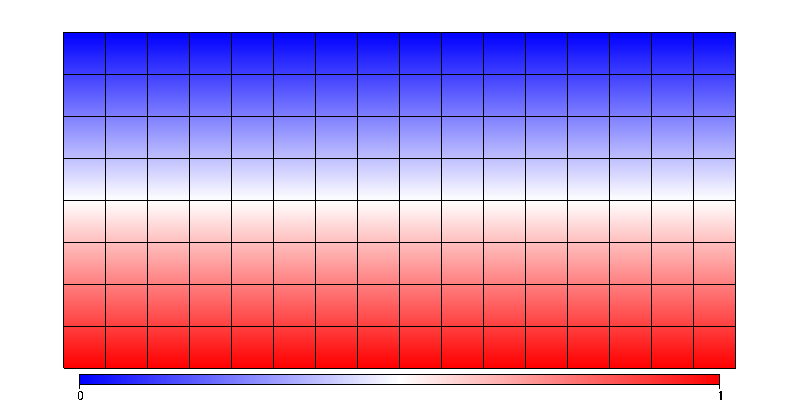

In [12]:
# gLucifer visualisation of temperature field & mesh
fig.show()

In [13]:
coordinate = fn.input()

In [14]:
fn_diffusivity = coordinate[1] + 0.2

In [15]:
heatequation = uw.systems.SteadyStateHeat(temperatureField=temperatureField, fn_diffusivity=fn_diffusivity, conditions=[tempBC,])

In [16]:
# get the default heat equation solver
heatsolver = uw.systems.Solver(heatequation)
# solve
heatsolver.solve()


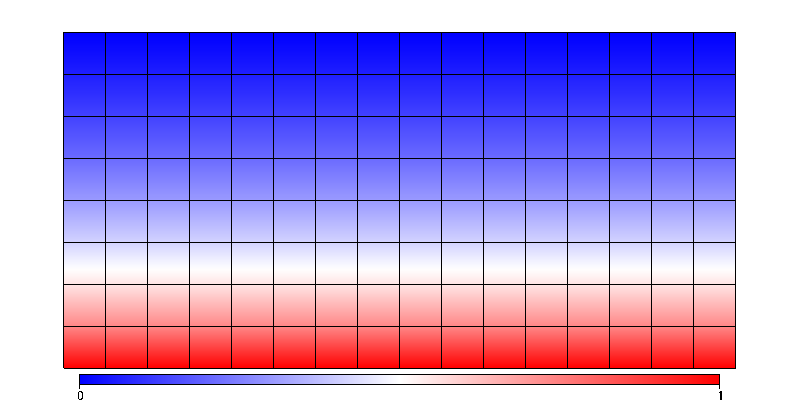

In [17]:
# gLucifer visualisation of temperature field & mesh
fig.show()

array([ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,  1.   ])

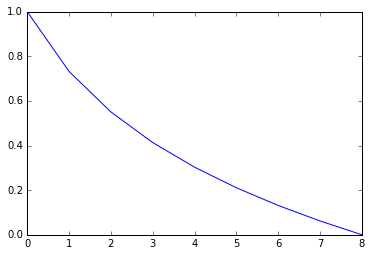

In [18]:

LWalls = mesh.specialSets["MinI_VertexSet"] 
tout = temperatureField.evaluate(LWalls)

plt.plot(tout)

meshys = mesh.data

axis = 1
thisaxis = axis

origcoords = np.linspace(mesh.minCoord[axis], mesh.maxCoord[axis], mesh.elementRes[axis] + 1)

incoords = np.array(zip(np.zeros(origcoords.shape[0]), origcoords))
outcoords = temperatureField.evaluate(incoords)[::-1]

origxcoords = np.around(np.linspace(mesh.minCoord[thisaxis ], mesh.maxCoord[thisaxis ], mesh.elementRes[thisaxis ] + 1), 5)
origxcoords

In [19]:
origxcoords = np.around(np.linspace(mesh.minCoord[thisaxis ], mesh.maxCoord[thisaxis ], mesh.elementRes[thisaxis ] + 1), 5)
dictionary = dict(itertools.izip(origxcoords, outcoords))

In [20]:
#with mesh.deform_mesh():
#    for index, coord in enumerate(mesh.data):
#        mesh.data[index][thisaxis] = dictionary[np.around(coord,5)[thisaxis]]


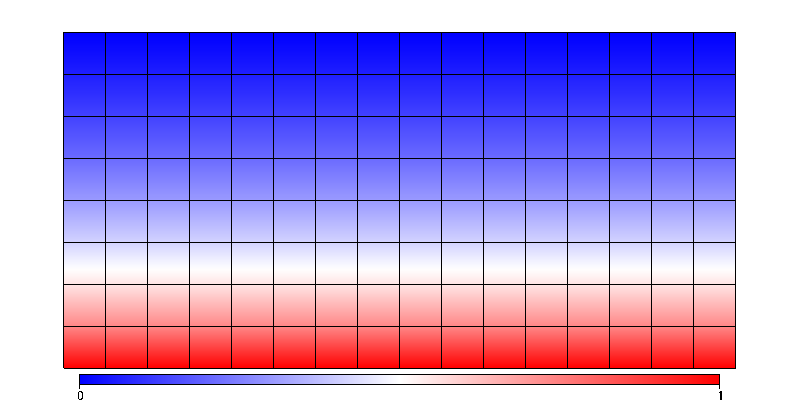

In [21]:
fig.show()

In [46]:
mesh.reset()

In [23]:
#with mesh.deform_mesh():
#    mesh.data[:,1] = temperatureField.evaluate(mesh.data)[::-1,0]

In [24]:
mesh.data[:,1]

array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.125,  0.125,  0.125,  0.125,  0.125,  0.125,  0.125,
        0.125,  0.125,  0.125,  0.125,  0.125,  0.125,  0.125,  0.125,
        0.125,  0.125,  0.25 ,  0.25 ,  0.25 ,  0.25 ,  0.25 ,  0.25 ,
        0.25 ,  0.25 ,  0.25 ,  0.25 ,  0.25 ,  0.25 ,  0.25 ,  0.25 ,
        0.25 ,  0.25 ,  0.25 ,  0.375,  0.375,  0.375,  0.375,  0.375,
        0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,
        0.375,  0.375,  0.375,  0.375,  0.5  ,  0.5  ,  0.5  ,  0.5  ,
        0.5  ,  0.5  ,  0.5  ,  0.5  ,  0.5  ,  0.5  ,  0.5  ,  0.5  ,
        0.5  ,  0.5  ,  0.5  ,  0.5  ,  0.5  ,  0.625,  0.625,  0.625,
        0.625,  0.625,  0.625,  0.625,  0.625,  0.625,  0.625,  0.625,
        0.625,  0.625,  0.625,  0.625,  0.625,  0.625,  0.75 ,  0.75 ,
        0.75 ,  0.75 ,  0.75 ,  0.75 ,  0.75 ,  0.75 ,  0.75 ,  0.75 ,
      

In [25]:
temperatureField.evaluate(mesh.data)[::-1,0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.06184282,  0.06184295,  0.06184305,
        0.06184314,  0.06184321,  0.06184361,  0.06184422,  0.06184466,
        0.0618448 ,  0.06184486,  0.06184502,  0.06184516,  0.06184511,
        0.06184489,  0.06184467,  0.06184455,  0.06184445,  0.13132062,
        0.13132102,  0.13132136,  0.13132163,  0.13132189,  0.13132262,
        0.13132371,  0.1313246 ,  0.13132497,  0.13132507,  0.13132526,
        0.13132545,  0.13132539,  0.13132507,  0.13132469,  0.13132449,
        0.1313244 ,  0.21058472,  0.21058527,  0.21058575,  0.21058632,
        0.21058694,  0.21058793,  0.21058924,  0.2105904 ,  0.21059102,
        0.21059122,  0.21059137,  0.21059153,  0.21059143,  0.21059108,
        0.21059063,  0.21059029,  0.21059021,  0.30284397,  0.30

In [26]:
#mesh.data[index][thisaxis]

In [42]:
dc = temperatureField.evaluate(mesh.data)[::-1,0].copy()
dc 

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.06184282,  0.06184295,  0.06184305,
        0.06184314,  0.06184321,  0.06184361,  0.06184422,  0.06184466,
        0.0618448 ,  0.06184486,  0.06184502,  0.06184516,  0.06184511,
        0.06184489,  0.06184467,  0.06184455,  0.06184445,  0.13132062,
        0.13132102,  0.13132136,  0.13132163,  0.13132189,  0.13132262,
        0.13132371,  0.1313246 ,  0.13132497,  0.13132507,  0.13132526,
        0.13132545,  0.13132539,  0.13132507,  0.13132469,  0.13132449,
        0.1313244 ,  0.21058472,  0.21058527,  0.21058575,  0.21058632,
        0.21058694,  0.21058793,  0.21058924,  0.2105904 ,  0.21059102,
        0.21059122,  0.21059137,  0.21059153,  0.21059143,  0.21059108,
        0.21059063,  0.21059029,  0.21059021,  0.30284397,  0.30

In [53]:
with mesh.deform_mesh():
    mesh.data[:,1] = dc


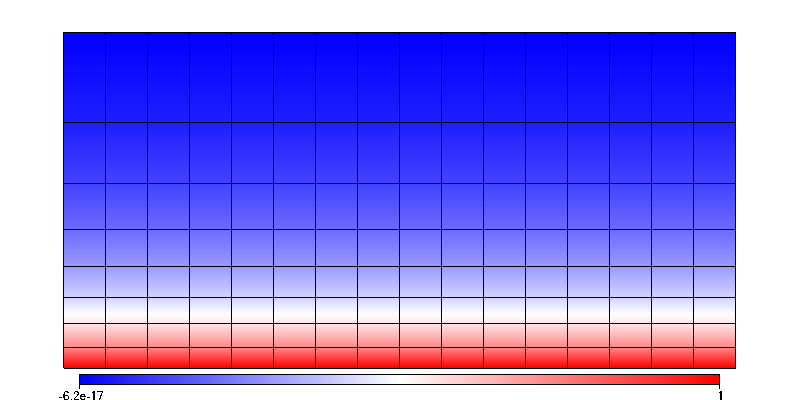

In [54]:
fig.show()